In [1]:
from spatialkfold import load_data
from spatialkfold import spatial_kfold_clusters 
from spatialkfold import spatial_blocks , spatial_kfold_blocks
from spatialkfold.plotting import spatial_kfold_plot
from spatialkfold.stats import spatial_kfold_stats

import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold 
from sklearn.model_selection import LeaveOneGroupOut 
from sklearn.model_selection import cross_validate

In [2]:
ames = load_data()

In [3]:
ames.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [4]:
ames

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,geometry
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141.0,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Pool,No_Fence,None,0,5,2010,WD,Normal,215000,POINT (-93.61975 42.05403)
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80.0,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Pool,Minimum_Privacy,None,0,6,2010,WD,Normal,105000,POINT (-93.61976 42.05301)
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81.0,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Pool,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,POINT (-93.61939 42.05266)
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93.0,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,No_Pool,No_Fence,None,0,4,2010,WD,Normal,244000,POINT (-93.61732 42.05125)
4,Two_Story_1946_and_Newer,Residential_Low_Density,74.0,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,No_Pool,Minimum_Privacy,None,0,3,2010,WD,Normal,189900,POINT (-93.63893 42.06090)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,Split_or_Multilevel,Residential_Low_Density,37.0,7937,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,CulDSac,...,No_Pool,Good_Privacy,None,0,3,2006,WD,Normal,142500,POINT (-93.60478 41.98896)
2926,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,0.0,8885,Pave,No_Alley_Access,Slightly_Irregular,Low,AllPub,Inside,...,No_Pool,Minimum_Privacy,None,0,6,2006,WD,Normal,131000,POINT (-93.60268 41.98831)
2927,Split_Foyer,Residential_Low_Density,62.0,10441,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Pool,Minimum_Privacy,Shed,700,7,2006,WD,Normal,132000,POINT (-93.60685 41.98651)
2928,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,77.0,10010,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Pool,No_Fence,None,0,4,2006,WD,Normal,170000,POINT (-93.60019 41.99092)


In [5]:
# Reproject to the approriate coordinate reference system 

In [6]:
ames_prj = ames.copy().to_crs(ames.estimate_utm_crs())

In [7]:
ames_prj.crs

<Derived Projected CRS: EPSG:32615>
Name: WGS 84 / UTM zone 15N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 96°W and 90°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - Manitoba; Nunavut; Ontario. Ecuador -Galapagos. Guatemala. Mexico. United States (USA).
- bounds: (-96.0, 0.0, -90.0, 84.0)
Coordinate Operation:
- name: UTM zone 15N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [8]:
# Add an id column for each data point 

In [9]:
ames_prj['id'] = range(len(ames_prj))

### 1. Spatial cluster resampling 

In [10]:
ames_clusters = spatial_kfold_clusters (gdf= ames_prj, name = 'id', nfolds = 10, random_state =569) 

In [11]:
ames_clusters

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,geometry,id,folds
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141.0,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,None,0,5,2010,WD,Normal,215000,POINT (448716.789 4655961.485),0,7
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80.0,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,None,0,6,2010,WD,Normal,105000,POINT (448715.802 4655848.124),1,7
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81.0,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,Gar2,12500,6,2010,WD,Normal,172000,POINT (448746.026 4655808.487),2,7
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93.0,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,None,0,4,2010,WD,Normal,244000,POINT (448915.962 4655650.253),3,7
4,Two_Story_1946_and_Newer,Residential_Low_Density,74.0,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,None,0,3,2010,WD,Normal,189900,POINT (447135.458 4656735.276),4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,Split_or_Multilevel,Residential_Low_Density,37.0,7937,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,CulDSac,...,None,0,3,2006,WD,Normal,142500,POINT (449905.137 4648727.785),2925,4
2926,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,0.0,8885,Pave,No_Alley_Access,Slightly_Irregular,Low,AllPub,Inside,...,None,0,6,2006,WD,Normal,131000,POINT (450078.246 4648654.392),2926,4
2927,Split_Foyer,Residential_Low_Density,62.0,10441,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Shed,700,7,2006,WD,Normal,132000,POINT (449731.661 4648456.532),2927,4
2928,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,77.0,10010,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,None,0,4,2006,WD,Normal,170000,POINT (450286.530 4648942.397),2928,4


In [12]:
# Get the 'tab20' colormap
cols_tab = cm.get_cmap('tab20', 10)
# Generate a list of colors from the colormap
cols = [cols_tab(i) for i in range(10)]
# create a color ramp
color_ramp = ListedColormap(cols)

Text(0.5, 1.0, 'Spatially Clustered Folds')

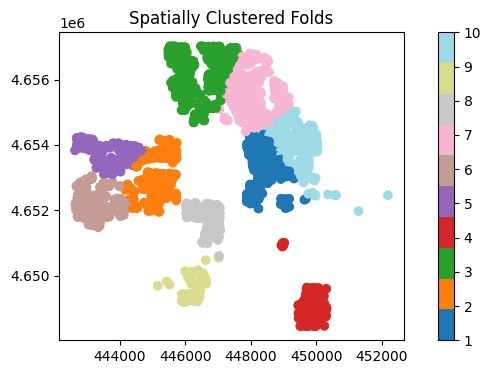

In [13]:
fig, ax = plt.subplots(1,1 , figsize=(9, 4)) 
ames_clusters.plot(column = 'folds', ax = ax, cmap = color_ramp, legend = True)
ax.set_title('Spatially Clustered Folds')

In [14]:
# check the number of train and test of the dependent variable for each folf

In [15]:
ames_clusters_stats = spatial_kfold_stats(ames_clusters, y= ames_clusters.Sale_Price, groups = ames_clusters.folds)


In [16]:
ames_clusters_stats

,split,train,test
0,1,2594,336
1,2,2687,243
2,3,2270,660
3,4,2769,161
4,5,2694,236
5,6,2606,324
6,7,2537,393
7,8,2790,140
8,9,2857,73
9,10,2566,364


### 2. Spatial Blocks

#### 2.1 spatial resampled random blocks

In [17]:
# create 10 random blocks 
ames_rnd_blocks = spatial_blocks(ames_prj, width = 1500, height = 1500, 
                                 method = 'random', nfolds = 10, 
                                 random_state = 135)

Text(0.5, 1.0, 'Random Blocks Folds')

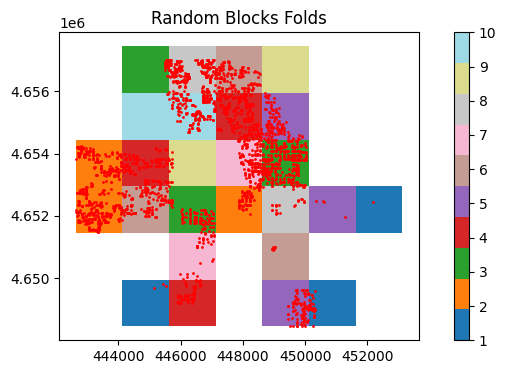

In [18]:
fig, ax = plt.subplots(1,1 , figsize=(9, 4)) 

ames_rnd_blocks.plot(column = 'folds',cmap = color_ramp, ax = ax ,lw=0.7, legend = True)
ames_prj.plot(ax=ax,  markersize = 1, color = 'r')
ax.set_title('Random Blocks Folds')

In [19]:
# resample the ames data with the prepared blocks 
ames_res_rnd_blk = spatial_kfold_blocks (ames_prj, ames_rnd_blocks)

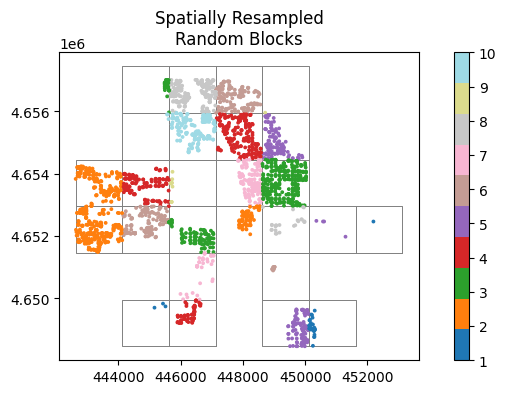

In [20]:
fig, ax = plt.subplots(1,1 , figsize=(9, 4)) 

ames_rnd_blocks.plot(facecolor="none",edgecolor='grey', ax = ax ,lw=0.7)
ames_res_rnd_blk.plot(column = 'folds', cmap = color_ramp,legend = True, ax = ax, markersize = 3)
ax.set_title('Spatially Resampled\nRandom Blocks')
plt.show()

In [21]:
ames_res_rnd_blk_stats = spatial_kfold_stats(ames_res_rnd_blk, y= ames_res_rnd_blk.Sale_Price, groups = ames_res_rnd_blk.folds)


In [22]:
ames_res_rnd_blk_stats

,split,train,test
0,1,2893,37
1,2,2371,559
2,3,2414,516
3,4,2472,458
4,5,2687,243
5,6,2608,322
6,7,2720,210
7,8,2589,341
8,9,2920,10
9,10,2696,234


#### 2.2 continuous spatial resampled blocks 

Two option are availble with orientation :
 - 'tb-lr' : top-bottom, left-right
 - ''bt-rl' : bottom-top, right-left

#####  2.2.1. 'tb-lr' : top-bottom, left-right

In [23]:
ames_cont_blocks = spatial_blocks(ames_prj, width = 1500, height = 1500, 
                              method = 'continuous', orientation = 'tb-lr' ,
                              nfolds = 10, random_state = 135)

Text(0.5, 1.0, 'Continuous Blocks Folds\norientation:"tb-lr"')

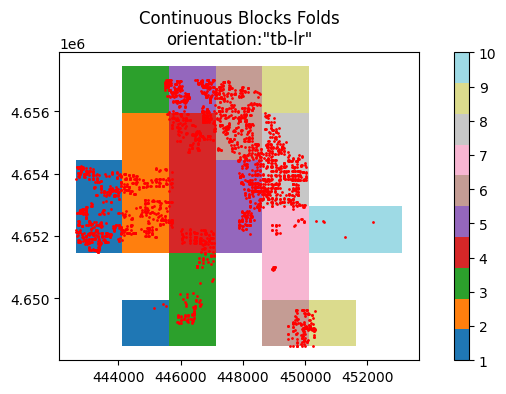

In [24]:
fig, ax = plt.subplots(1,1 , figsize=(9, 4)) 

ames_cont_blocks.plot(column = 'folds',cmap = color_ramp, ax = ax ,lw=0.7, legend = True)
ames_prj.plot(ax=ax,  markersize = 1, color = 'r')
ax.set_title('Continuous Blocks Folds\norientation:"tb-lr"')

In [25]:
# resample the ames data with the prepared blocks 
ames_res_cont_blk = spatial_kfold_blocks (ames_prj, ames_cont_blocks)

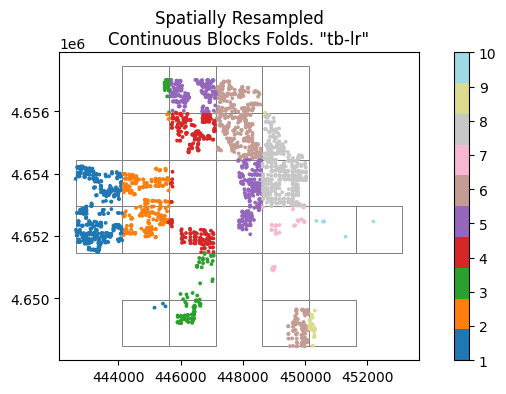

In [26]:
fig, ax = plt.subplots(1,1 , figsize=(9, 4)) 

ames_cont_blocks.plot(facecolor="none",edgecolor='grey', ax = ax ,lw=0.7)
ames_res_cont_blk.plot(column = 'folds', cmap = color_ramp,legend = True, ax = ax, markersize = 3)
ax.set_title('Spatially Resampled\nContinuous Blocks Folds. "tb-lr"')
plt.show()

In [27]:
ames_res_cont_blk_stats = spatial_kfold_stats(ames_res_cont_blk, y= ames_res_cont_blk.Sale_Price, groups = ames_res_cont_blk.folds)


In [28]:
ames_res_cont_blk_stats

,split,train,test
0,1,2446,484
1,2,2628,302
2,3,2801,129
3,4,2567,363
4,5,2367,563
5,6,2402,528
6,7,2894,36
7,8,2444,486
8,9,2896,34
9,10,2925,5


#####  2.2.2. 'bt-rl' : bottom-top, right-left

In [29]:
ames_cont_blocks_rev = spatial_blocks(ames_prj, width = 1500, height = 1500, 
                              method = 'continuous', orientation = 'bt-rl',
                              nfolds = 10, random_state = 135)

Text(0.5, 1.0, 'Continuous Blocks Folds\norientation:"bt-rl"')

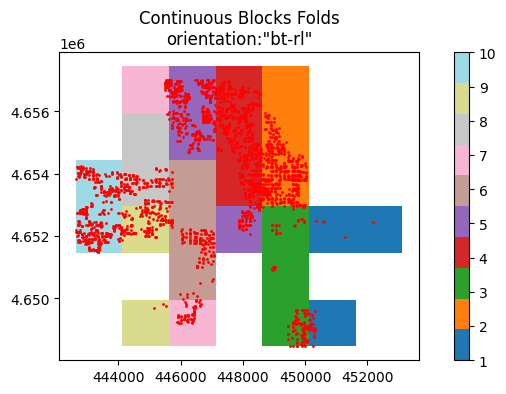

In [30]:
fig, ax = plt.subplots(1,1 , figsize=(9, 4)) 

ames_cont_blocks_rev.plot(column = 'folds',cmap = color_ramp, ax = ax ,lw=0.7, legend = True)
ames_prj.plot(ax=ax,  markersize = 1, color = 'r')
ax.set_title('Continuous Blocks Folds\norientation:"bt-rl"')

In [31]:
# resample the ames data with the prepared blocks 
ames_res_cont_blk_rev = spatial_kfold_blocks (ames_prj, ames_cont_blocks_rev)

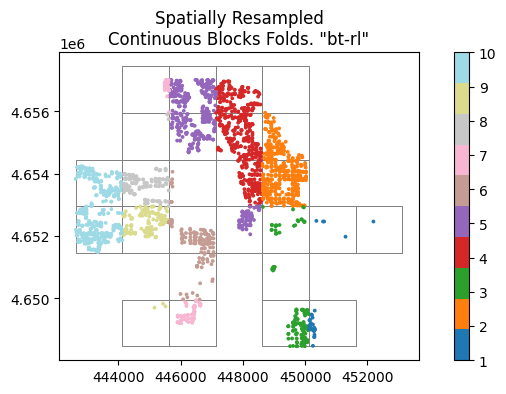

In [32]:
fig, ax = plt.subplots(1,1 , figsize=(9, 4)) 

ames_cont_blocks_rev.plot(facecolor="none",edgecolor='grey', ax = ax ,lw=0.7)
ames_res_cont_blk_rev.plot(column = 'folds', cmap = color_ramp,legend = True, ax = ax, markersize = 3)
ax.set_title('Spatially Resampled\nContinuous Blocks Folds. "bt-rl"')
plt.show()

In [33]:
ames_res_cont_blk_rev_stats = spatial_kfold_stats(ames_res_cont_blk_rev, y= ames_res_cont_blk_rev.Sale_Price, groups = ames_res_cont_blk_rev.folds)


In [34]:
ames_res_cont_blk_rev_stats

,split,train,test
0,1,2892,38
1,2,2443,487
2,3,2776,154
3,4,2350,580
4,5,2306,624
5,6,2758,172
6,7,2841,89
7,8,2772,158
8,9,2783,147
9,10,2449,481


### 3. Flotting function 

visiaulise the partitioning of the data at each fold

In [35]:
# checn the folds number 
np.unique(ames_clusters.folds.values)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int32)

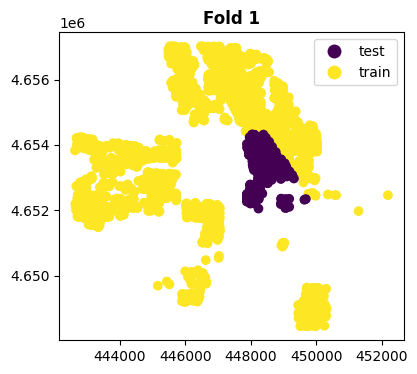

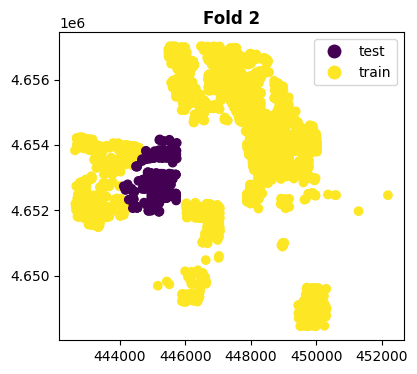

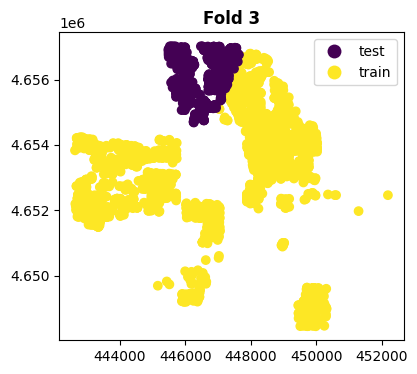

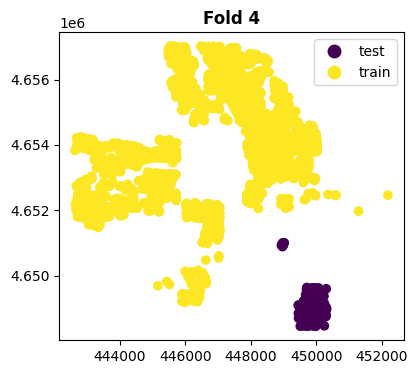

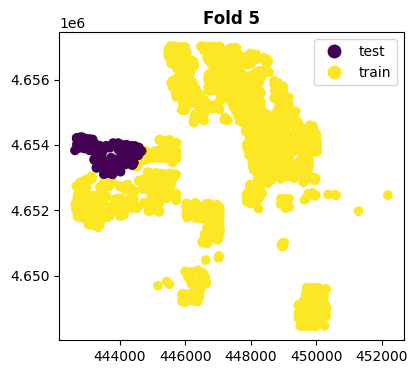

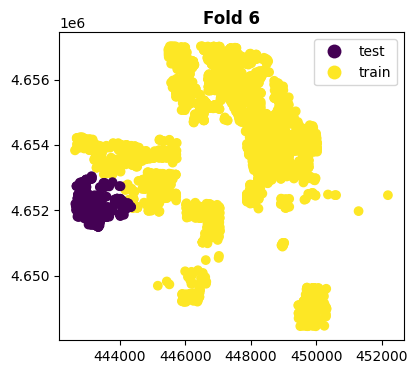

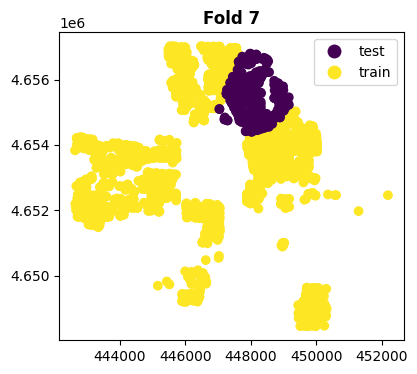

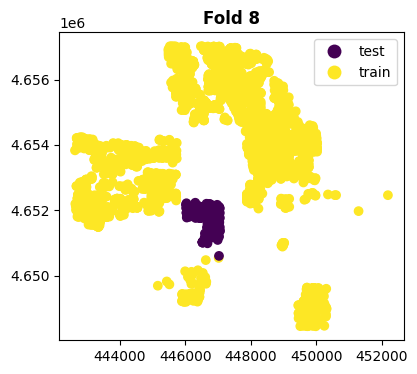

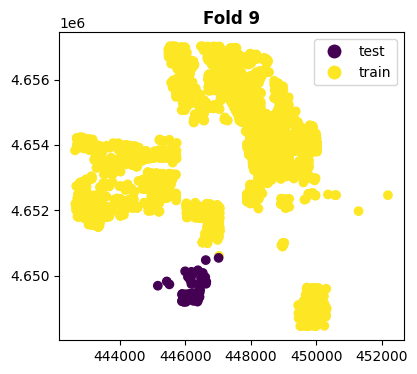

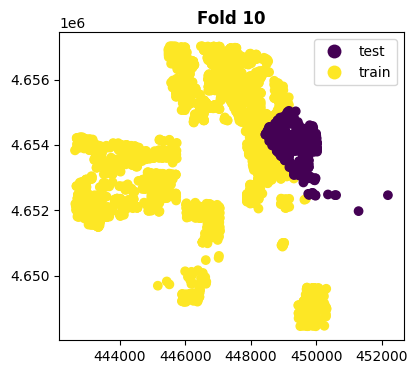

In [36]:
for i in range(1,11):
    fig, ax = plt.subplots(1,1 , figsize= (9, 4))

    spatial_kfold_plot(ames_clusters, 
                       ames_clusters.geometry, 
                       groups= ames_clusters.folds, 
                       fold_num = i, cmap = 'viridis', ax = ax)

## II. Comparaison : Random VS Spatial Cross validataion

In [37]:
x = ames_prj[['Year_Built', 'Bldg_Type', 'Gr_Liv_Area']]
y = ames_prj[['Sale_Price']]

le = preprocessing.LabelEncoder()
le.fit(x["Bldg_Type"])

list(le.classes_)

le.transform(ames_prj["Bldg_Type"])

array([1, 1, 1, ..., 1, 1, 1])

In [38]:
# Create a copy of the DataFrame and transform the 'Bldg_Type' column to float values
x_copy = x.copy()
x_copy['type'] = le.transform(x_copy["Bldg_Type"])

In [39]:
# Get the independent variable and the dependent variable
X = x_copy[['Year_Built', 'type', 'Gr_Liv_Area']]
y = ames_prj[['Sale_Price']]

In [40]:
X

,Year_Built,type,Gr_Liv_Area
0,1960,1,1656
1,1961,1,896
2,1958,1,1329
3,1968,1,2110
4,1997,1,1629
...,...,...,...
2925,1984,1,1003
2926,1983,1,902
2927,1992,1,970
2928,1974,1,1389


In [41]:
y

,Sale_Price
0,215000
1,105000
2,172000
3,244000
4,189900
...,...
2925,142500
2926,131000
2927,132000
2928,170000


#### 1. Random CV

In [42]:
# initiate a linear regressor 
reg = LinearRegression()

# initiate a random CV
kf = KFold(n_splits = 10, shuffle=True, random_state=123)

# evaluate the model and collect the results
random_n_scores = cross_validate(reg, X, y.values.ravel(), 
                                scoring= ['neg_root_mean_squared_error', 'r2', 'neg_mean_absolute_error'], 
                                cv=kf, n_jobs=-1, error_score='raise')

In [43]:
random_n_scores

{'fit_time': array([0.00504827, 0.01188612, 0.0073173 , 0.00316668, 0.02892733,
        0.00352216, 0.00360513, 0.00369263, 0.00372505, 0.00309181]),
 'score_time': array([0.00310826, 0.00284529, 0.00284457, 0.00193214, 0.00257397,
        0.00238633, 0.00306869, 0.00289321, 0.00260401, 0.00272298]),
 'test_neg_root_mean_squared_error': array([-44622.40838673, -39772.65742074, -44832.52140754, -45450.03692245,
        -50212.56009308, -49287.98884697, -39787.31970143, -52631.12777371,
        -58187.6988452 , -38817.22221497]),
 'test_r2': array([0.68186786, 0.65778112, 0.71220595, 0.68753325, 0.62837042,
        0.6002097 , 0.69541257, 0.59591238, 0.61584596, 0.71330735]),
 'test_neg_mean_absolute_error': array([-30212.75246135, -28792.38398508, -31229.5572116 , -32461.80017946,
        -32897.03779732, -32580.57849056, -29550.97789663, -35188.52372995,
        -35547.25333851, -28150.39632891])}

In [44]:
rn_cv_r2 = np.mean(random_n_scores["test_r2"])
rn_cv_rmse = np.mean(abs(random_n_scores["test_neg_root_mean_squared_error"]))
rn_cv_mae = np.mean(abs(random_n_scores["test_neg_mean_absolute_error"]))

print('R2 :',rn_cv_r2)
print('RMSE :',rn_cv_rmse)
print('MAE :',rn_cv_mae)

R2 : 0.6588446547591043
RMSE : 46360.15416128094
MAE : 31661.12614193703


#### Spatial CV:

using a Leave Region Out Cross vlidation 

In [45]:
# Initiate a leave group out cross valiadtion
group_cvs =  LeaveOneGroupOut()

# evaluate the model and collect the results
spatial_cluster_scores = cross_validate(reg, X, y.values.ravel(), 
                                scoring= ['neg_root_mean_squared_error', 'r2', 'neg_mean_absolute_error'], 
                                cv= group_cvs.split(X, y, ames_clusters.folds.values.ravel()), # spatial cross validation
                                n_jobs=-1, error_score='raise')

In [46]:
spatial_cluster_scores

{'fit_time': array([0.00420189, 0.00420213, 0.00947499, 0.03331947, 0.01048255,
        0.01425648, 0.01107073, 0.00482726, 0.00362611, 0.00232935]),
 'score_time': array([0.00319242, 0.00401902, 0.02814436, 0.00678372, 0.00516319,
        0.00358295, 0.00296593, 0.00365758, 0.00177646, 0.00201344]),
 'test_neg_root_mean_squared_error': array([-32584.4053578 , -42462.36798639, -69407.94633799, -45746.18536977,
        -36288.31271365, -53574.0001557 , -47398.51917363, -45273.9069811 ,
        -58390.82718082, -30799.97881478]),
 'test_r2': array([0.11236541, 0.48113758, 0.38725729, 0.42016374, 0.39517381,
        0.08606133, 0.64465365, 0.3585445 , 0.28560365, 0.43457762]),
 'test_neg_mean_absolute_error': array([-25492.58263524, -31696.8542513 , -46437.31112439, -33609.13258888,
        -27085.76797277, -29348.50486361, -30496.57294528, -36918.25721939,
        -44205.00840178, -22415.83713075])}

In [47]:
sp_cv_r2 = np.mean(spatial_cluster_scores["test_r2"])
sp_cv_rmse = np.mean(abs(spatial_cluster_scores["test_neg_root_mean_squared_error"]))
sp_cv_mae = np.mean(abs(spatial_cluster_scores["test_neg_mean_absolute_error"]))

print('R2 :',sp_cv_r2)
print('RMSE :',sp_cv_rmse)
print('MAE :',sp_cv_mae)

R2 : 0.3605538569696984
RMSE : 46192.645007163155
MAE : 32770.58291333944


In [48]:
random_n_scores['test_r2']

array([0.68186786, 0.65778112, 0.71220595, 0.68753325, 0.62837042,
       0.6002097 , 0.69541257, 0.59591238, 0.61584596, 0.71330735])

In [49]:
df_rn_cv_scores = pd.DataFrame({'r2': random_n_scores['test_r2'], 
             'rmse' :abs(random_n_scores['test_neg_root_mean_squared_error']),
             'mae' : abs(random_n_scores["test_neg_mean_absolute_error"]),
            'cv_type' : 'Random CV'})

In [50]:
df_rn_cv_scores

,r2,rmse,mae,cv_type
0,0.681868,44622.408387,30212.752461,Random CV
1,0.657781,39772.657421,28792.383985,Random CV
2,0.712206,44832.521408,31229.557212,Random CV
3,0.687533,45450.036922,32461.800179,Random CV
4,0.628370,50212.560093,32897.037797,Random CV
5,0.600210,49287.988847,32580.578491,Random CV
6,0.695413,39787.319701,29550.977897,Random CV
7,0.595912,52631.127774,35188.523730,Random CV
8,0.615846,58187.698845,35547.253339,Random CV
9,0.713307,38817.222215,28150.396329,Random CV


In [51]:
df_sp_cv_scores = pd.DataFrame({'r2': spatial_cluster_scores['test_r2'], 
             'rmse' :abs(spatial_cluster_scores['test_neg_root_mean_squared_error']),
             'mae' : abs(spatial_cluster_scores["test_neg_mean_absolute_error"]),
            'cv_type' : 'Spatial CV'})

In [52]:
df_sp_cv_scores

,r2,rmse,mae,cv_type
0,0.112365,32584.405358,25492.582635,Spatial CV
1,0.481138,42462.367986,31696.854251,Spatial CV
2,0.387257,69407.946338,46437.311124,Spatial CV
3,0.420164,45746.185370,33609.132589,Spatial CV
4,0.395174,36288.312714,27085.767973,Spatial CV
5,0.086061,53574.000156,29348.504864,Spatial CV
6,0.644654,47398.519174,30496.572945,Spatial CV
7,0.358544,45273.906981,36918.257219,Spatial CV
8,0.285604,58390.827181,44205.008402,Spatial CV
9,0.434578,30799.978815,22415.837131,Spatial CV


In [53]:
cv_metrics = pd.concat([df_rn_cv_scores, df_sp_cv_scores])

In [54]:
cv_metrics

,r2,rmse,mae,cv_type
0,0.681868,44622.408387,30212.752461,Random CV
1,0.657781,39772.657421,28792.383985,Random CV
2,0.712206,44832.521408,31229.557212,Random CV
3,0.687533,45450.036922,32461.800179,Random CV
4,0.628370,50212.560093,32897.037797,Random CV
5,0.600210,49287.988847,32580.578491,Random CV
6,0.695413,39787.319701,29550.977897,Random CV
7,0.595912,52631.127774,35188.523730,Random CV
8,0.615846,58187.698845,35547.253339,Random CV
9,0.713307,38817.222215,28150.396329,Random CV


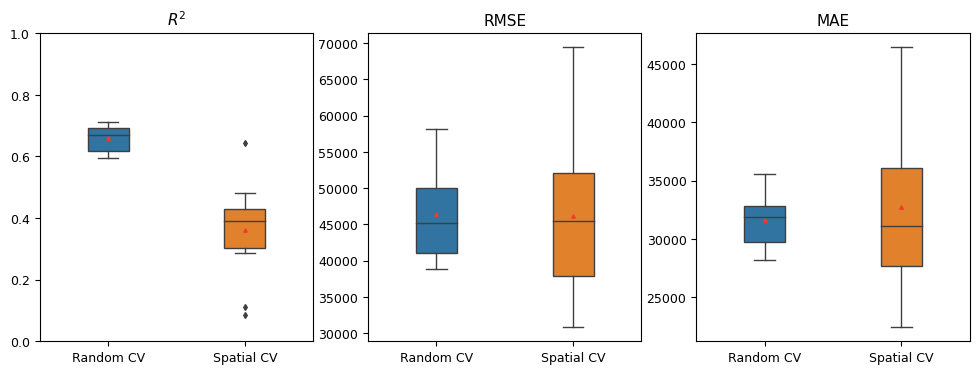

In [55]:
fig, ax =  plt.subplots(1, 3,figsize=(12, 4))

my_colors = {'Random CV': '#1f77b4', 'Spatial CV': '#ff7f0e', 'C': 'gold'}

sns.boxplot(data = cv_metrics,
            hue = 'cv_type', 
            x = 'cv_type',
            y = 'r2',  
            dodge=False, width = .3, linewidth = 1, ax = ax[0],
            #palette= 'coolwarm',
            palette = my_colors,
            showmeans=True, meanprops={"markersize": "2.5", "markerfacecolor" : "#ef3b2c",
                    "markeredgecolor" : "#ef3b2c"} ,flierprops=dict(markersize=3))

ax[0].set_title( r'$R^2$',fontsize=11)
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].set_ylim(0, 1)
ax[0].tick_params(labelsize = 9)
ax[0].legend([],[], frameon=False)

#
sns.boxplot(data = cv_metrics,
            hue = 'cv_type', 
            x = 'cv_type',
            y = 'rmse',  
            dodge=False, width = .3, linewidth = 1, ax = ax[1],
            #palette= 'coolwarm',
            palette = my_colors,
           showmeans=True, meanprops={"markersize": "2.5",  "markerfacecolor" : "#ef3b2c",
                    "markeredgecolor" : "#ef3b2c"},  flierprops=dict(markersize=3))
ax[1].set_title('RMSE',fontsize=11)
ax[1].set_ylabel('')
ax[1].set_xlabel('')
ax[1].tick_params(labelsize = 9)
ax[1].legend([],[], frameon=False)

sns.boxplot(data = cv_metrics,
            hue = 'cv_type',
            x = 'cv_type',
            y = 'mae',  
            dodge=False, width = .3, linewidth = 1, ax = ax[2],
            #palette= 'coolwarm',
            palette = my_colors,
           showmeans=True, meanprops={"markersize": "2.5",  "markerfacecolor" : "#ef3b2c",
                    "markeredgecolor" : "#ef3b2c"},  flierprops=dict(markersize=3))
ax[2].set_title('MAE',fontsize=11)
ax[2].set_ylabel('')
ax[2].set_xlabel('')
ax[2].tick_params(labelsize = 9)

plt.legend([],[], frameon=False)
plt.show()